# Visualizing Time Series Data

In [1]:
import pandas as pd

df = pd.read_csv('../meta/starbucks.csv',index_col='Date',parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


## X Ticks: Set the spacing
How to change the format and appearance of dates along the x-axis. To do this, we'll borrow a tool from <tt>matplotlib</tt> called `dates`. <br>
The x-axis values can be divided into major and minor axes. For now, we'll work only with the major axis and learn how to set the spacing with `.set_major_locator()`

In [2]:
from matplotlib import dates

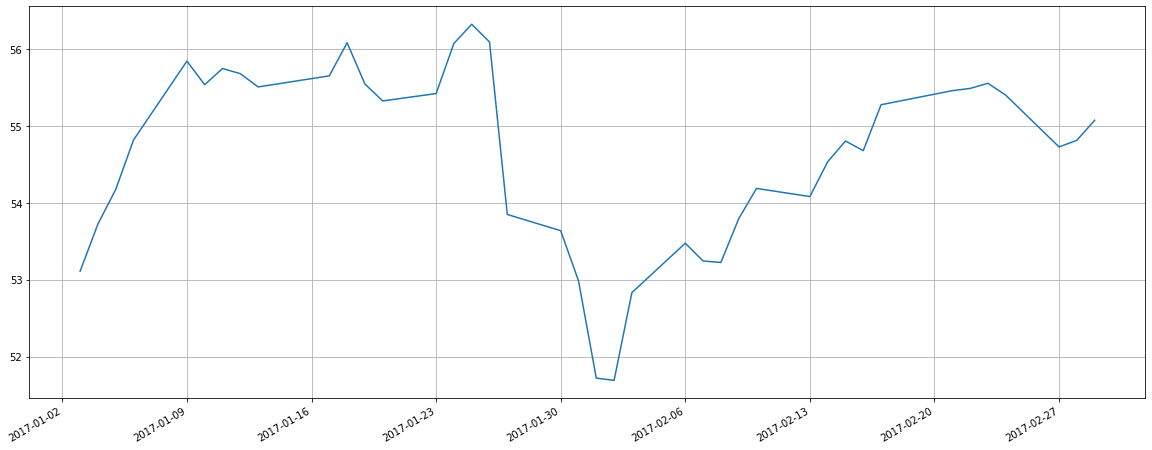

In [3]:
# CREATE OUR AXIS OBJECT
ax = df['Close']['2017-01-01':'2017-03-01'].plot(figsize=(20, 8), grid=True)

# REMOVE PANDAS DEFAULT "Date" LABEL
ax.set(xlabel='')

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

Notice that dates are spaced one week apart. The dates themselves correspond with <tt>byweekday=0</tt>, or Mondays.<br>
For a full list of locator options available from <tt>matplotlib.dates</tt> visit <a href='https://matplotlib.org/api/dates_api.html#date-tickers'>https://matplotlib.org/api/dates_api.html#date-tickers</a>

### Date Formatting
Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

In [4]:
# USE THIS SPACE TO EXPERIMENT WITH DIFFERENT FORMATS
from datetime import datetime
datetime(2001, 2, 3, 16, 5, 6).strftime("%A, %B %d, %Y  %I:%M:%S %p")

'Saturday, February 03, 2001  04:05:06 PM'

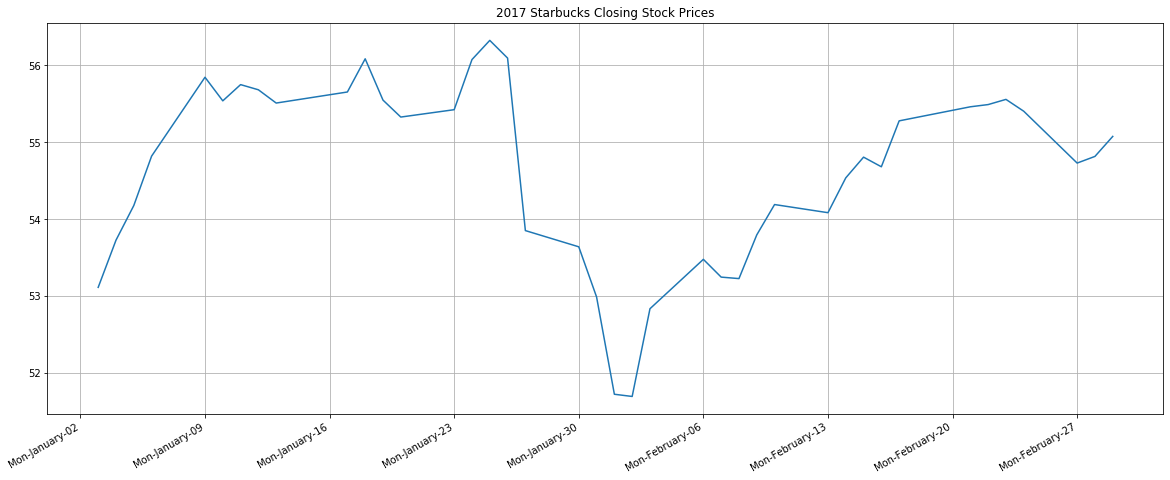

In [5]:
ax = df['Close']['2017-01-01':'2017-03-01'].plot(title='2017 Starbucks Closing Stock Prices', figsize=(20, 8), grid=True)
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter("%a-%B-%d"))

## Major vs. Minor Axis Values
All of the tick marks we've used so far have belonged to the major axis. We can assign another level called the <em>minor axis</em>, perhaps to separate month names from days of the month.

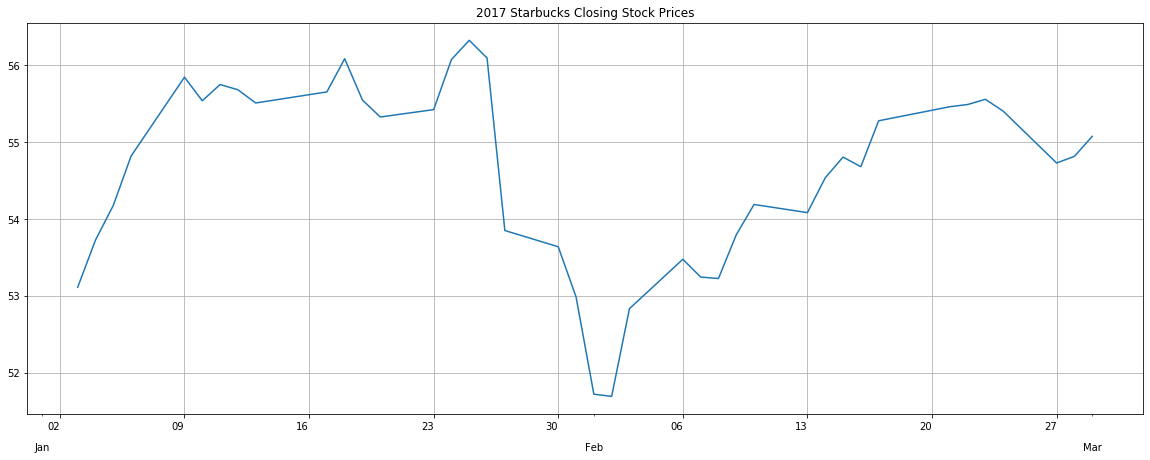

In [6]:
ax = df['Close']['2017-01-01':'2017-03-01'].plot(rot=0,title='2017 Starbucks Closing Stock Prices', figsize=(20, 8), grid=True)
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

**NOTE:** we passed a rotation argument **rot=0** into **`df.plot()`** so that the major axis values appear horizontal, not slanted.